In [172]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("BaseData.csv")
data.head()
data["month_num"] = data["month_num"].astype(int)
data["day"] = data["day"].astype(int)

data.drop(["Unnamed: 12"], axis=1)
data.head()


# from imblearn.under_sampling import RandomUnderSampler
# undersampler = RandomUnderSampler()




# delete_target = []
# for i in range(len(data)):
#     if len(delete_target) > 700:
#         break
#     if data.iloc[i,0] == 150:
#         delete_target.append(i)
        
# data = data.drop(delete_target)
# print(len(data))

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\yz391\Anaconda3\lib\site-packages\sklearn\base.py)

# Do one-hot on company scale

In [147]:
scale = data["scale"].to_numpy()

def map(string, vector):
    res = ["0" for i in range(len(vector))]
    for i in range(len(vector)):
        if isinstance(vector[i],tuple):
            for sub_label in vector[i]:
                if sub_label in string:
                    res[i] = "1"
        elif vector[i] in string:
            res[i] = "1"
            
    return res

scale_vector = ["2000人以上",("500-2000人","500—2000人"),("150-500人","50-100人","50-150人","50-200人"),("15-50人","少于50人"),"未知规模"]

mapped_scale = []
for i in scale:
    mapped = map(i,scale_vector)
    mapped_scale.append(mapped)
    

matrix = np.array(mapped_scale)

scale_df = pd.DataFrame(data=matrix, columns=["2000人以上","500-2000人","50-500人","少于50人","未知规模"])
scale_df.head()

,2000人以上,500-2000人,50-500人,少于50人,未知规模
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0


# Concatenate Text Columns 

In [148]:
c_desc = data["c_desc"]
c_tag = data["c_tag"]
name = data["name"]

text_df = name
text_df.head()

0    新媒体运维实习生（线上）
2           测试实习生
3     国际学校品牌宣传实习生
5         医学数据实习生
6         猎头顾问管培生
Name: name, dtype: object

# Label Data

(array([1180.,    0.,    0.,  921.,    0.,    0., 1170.,    0.,    0.,
        1027.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

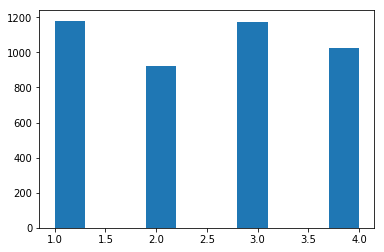

In [149]:
label = []
max_sal = data['maxsal'].to_numpy()

for i in max_sal:
    if i in range(0,150):
        label.append(1)
    elif i in range(150,175):
        label.append(2)
    
    elif i in range(175,250):
        label.append(3)
   
    else:
        label.append(4)
        
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)


# Do TF-IDF on Text

In [120]:
# import jieba
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer

# #Split words
# des = text_df["text"].to_list()

# cutted_des = [list(jieba.cut(re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", sentence))) for sentence in des]
# document = [" ".join(cutted) for cutted in cutted_des]

# #Load stop words
# with open("cn_stopwords.txt","r",encoding="utf-8") as fp:
#     word_list = fp.read().split("\n")
    
# extra_wordlist = ["一代","一名","一所","一批","一支","一款","一直","一种","一级","一群"]
# word_list += extra_wordlist

# tfidf_model = TfidfVectorizer(stop_words=word_list, max_df = 0.005, min_df=0.001).fit(document)

# matrix = tfidf_model.transform(document).todense()
# volcab = tfidf_model.vocabulary_


# name_header = [0]*len(volcab)
# for name, val in volcab.items():
#     name_header[val] = name
    
    
# processed_df=pd.DataFrame(data=matrix, columns = name_header)

# print(len(volcab))
# print(volcab)



In [150]:
print(x_train_padded_seqs.shape)
y_train.reshape(3999,1)

(3999, 50)


array([[1],
       [3],
       [3],
       ...,
       [2],
       [3],
       [2]])

In [163]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding,Conv1D,MaxPooling1D,Flatten,Dropout,BatchNormalization,Dense
import pandas as pd
import jieba
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
 

#Split words
text = data["name"].to_list()
cutted_text = [list(jieba.cut(re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", sentence))) for sentence in text]
corpus = []
for i in cutted_text:
    corpus += i

document = [" ".join(cutted) for cutted in cutted_text]
processed_df = pd.DataFrame(data=document, columns = ["text"])



from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpus, size=50, window=5, min_count=5, workers=4)


x_train, x_test, y_train, y_test = train_test_split(processed_df['text'], y, test_size=0.2,random_state=110)
# 将每个样本中的每个词转换为数字列表，使用每个词的编号进行编号


In [166]:
def transform_to_matrix(x, padding_size=256, vec_size=50):
    res = []
    for sen in x:
        matrix = []
        for i in range(padding_size):
            try:
                matrix.append(model[sen[i]].tolist())
            except:
                # 这里有两种except情况，
                # 1. 这个单词找不到
                # 2. sen没那么长
                # 不管哪种情况，我们直接贴上全是0的vec
                matrix.append([0] * vec_size)
        res.append(matrix)
    return res


X_train = transform_to_matrix(x_train)
X_test = transform_to_matrix(x_test)

X_train = np.array(X_train)
X_test = np.array(X_test)

# 看看数组的大小
print(X_train.shape)
print(X_test.shape)

C:\Users\yz391\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(3438, 256, 50)
(860, 256, 50)


In [167]:
X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
#通过print(X_test)观察与前者的区别，就是多了一个括号
print(X_train.shape)
print(X_test.shape)

(3438, 256, 50, 1)
(860, 256, 50, 1)


In [183]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

# set parameters:
batch_size = 32
n_filter = 16
filter_length =4
nb_epoch = 200
n_pool = 2

# 新建一个sequential的模型
model = Sequential()
model.add(Convolution2D(n_filter,filter_length,filter_length,input_shape=(256, 50,1)))
model.add(Activation('relu'))
model.add(Convolution2D(n_filter,filter_length,filter_length))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))


model.add(Dropout(0.25))
model.add(Flatten())
# 后面接上一个ANN
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))
# compile模型
model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

In [184]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch)
score = model.evaluate(X_train, y_train)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/200
108/108 [==============================] - 1s 8ms/step - loss: 3.3787 - accuracy: 0.2787
Epoch 2/200
108/108 [==============================] - 1s 8ms/step - loss: 3.3787 - accuracy: 0.2787
Epoch 3/200
108/108 [==============================] - 1s 8ms/step - loss: 3.3787 - accuracy: 0.2787
Epoch 4/200
 27/108 [======>.......................] - ETA: 0s - loss: 3.2500 - accuracy: 0.2743

KeyboardInterrupt: 